In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm
from io import StringIO
from sklearn.model_selection import train_test_split

In [308]:
speed = 400
tau = 20

In [309]:
file_name = f"./data/u{tau}/onehalf/data{speed}0000.csv"

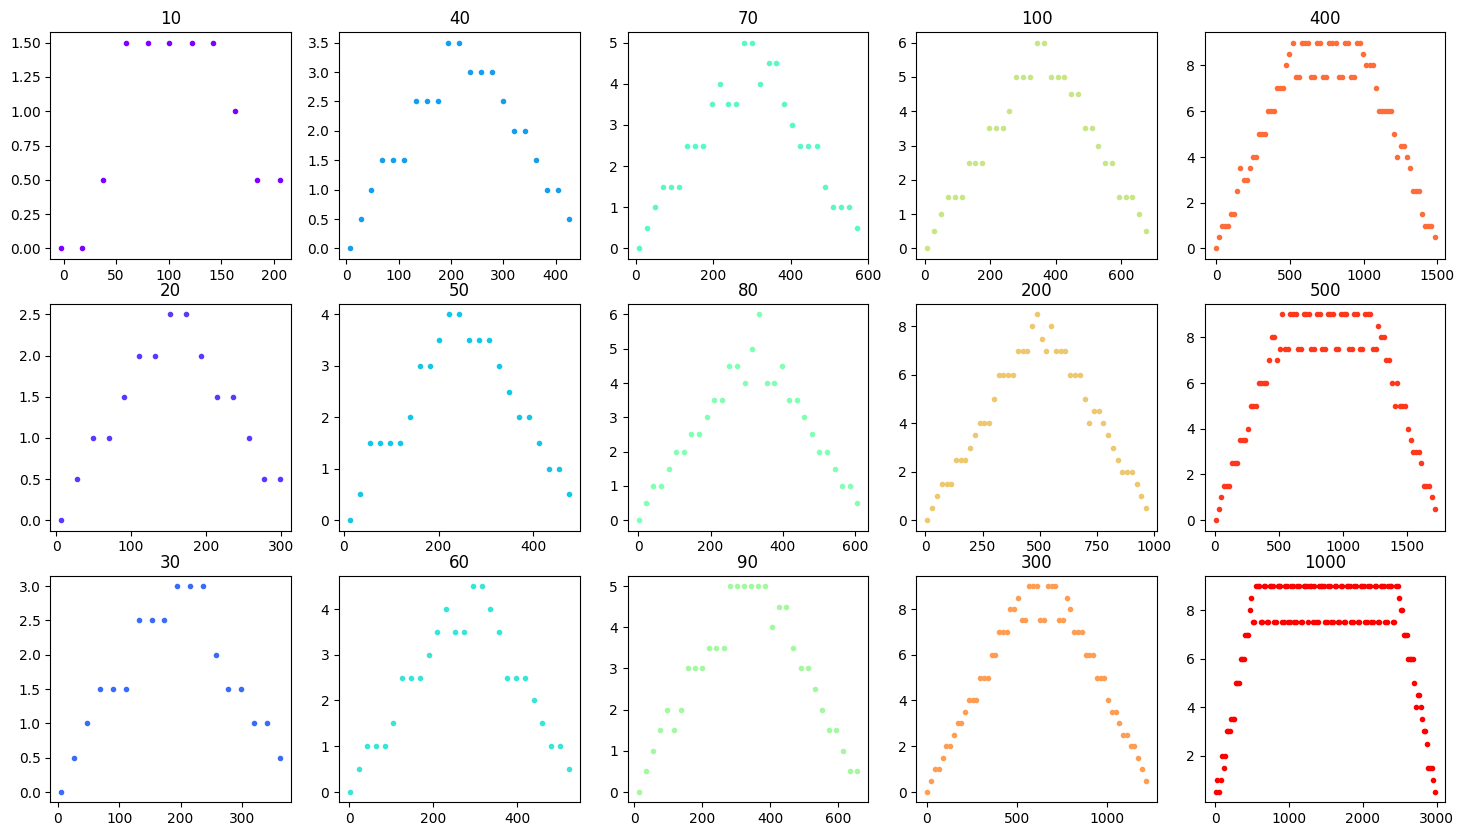

In [310]:
with open(file_name, "r") as f:
    data = f.read()

split_data = data.split("\n\n")[:-1]
# print(split_data[0])

color = cm.rainbow(np.linspace(0, 1, len(split_data)))

targets = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 1000]
fig, ax = plt.subplots(
    nrows=3, ncols=len(targets) // 3, num=file_name, figsize=(18, 10)
)
dfs = []
for i, split in enumerate(split_data):
    df = pd.read_csv(StringIO(split), sep=",", header=None)
    times = df[0].to_numpy()
    locations = df[1].to_numpy()
    speeds = [y - x for x, y in zip(locations, locations[1:])]
    speeds = [(x + y) / 2 for x, y in zip(speeds + [0], [0] + speeds)]
    # speeds += [0]
    df[2] = speeds
    accelerations = [y - x for x, y in zip(speeds, speeds[1:])]
    accelerations = [
        (x + y) / 2 for x, y in zip(accelerations + [0], [0] + accelerations)
    ]
    # accelerations += [0]
    df[3] = accelerations
    # ax[i % 3][i // 3].scatter(times, locations, c=[color[i]], marker='.')
    ax[i % 3][i // 3].scatter(times, speeds, c=[color[i]], marker=".")
    ax[i % 3][i // 3].set_title(targets[i])
    dfs.append(df)
plt.show()

In [311]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [312]:
idx = -2
df = dfs[idx]

In [313]:
df[0] = df[0] - df[0][0]

In [314]:
yt = df[2]
Xt = df[0]

In [315]:
yt

0     0.0
1     0.5
2     1.0
3     1.5
4     1.5
     ... 
78    1.5
79    1.5
80    1.5
81    1.0
82    0.5
Name: 2, Length: 83, dtype: float64

In [316]:
consider_till = yt.argmax() + 1
consider_till

26

In [317]:
X1 = np.array(Xt[:consider_till]).reshape(-1, 1)
y1 = np.array(yt[:consider_till]).reshape(-1, 1)

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1)

In [319]:
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.9718328030971153


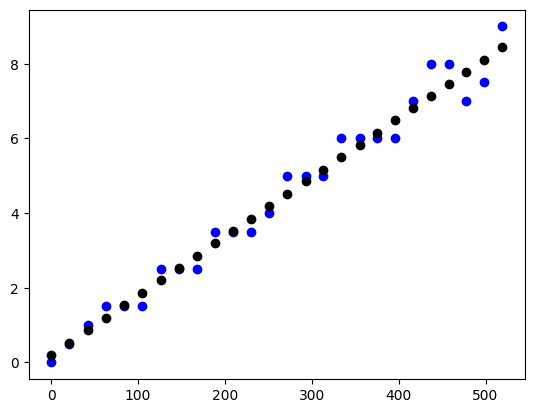

In [320]:
y_pred = regr.predict(X1)
plt.scatter(X1, y1, color="b")
plt.scatter(X1, y_pred, color="k")

plt.show()

In [321]:
regr.coef_, regr.intercept_

(array([[0.01588404]]), array([0.19671766]))

In [322]:
m1 = []
b1 = []
for i in range(len(dfs)):
    df = dfs[i]
    df[0] = df[0] - df[0][0]
    y_ = df[2]
    X_ = df[0]
    consider_till = y_[::-1].argmax() + 1
    X1_ = np.array(X_[:consider_till]).reshape(-1, 1)
    y1_ = np.array(y_[:consider_till]).reshape(-1, 1)
    # X_train, X_test, y_train, y_test = train_test_split(X1_, y1_, test_size = 0.1)
    regr_ = LinearRegression()
    regr_.fit(X1_, y1_)
    print(regr_.score(X1_, y1_))
    m1.append(regr_.coef_[0])
    b1.append(regr_.intercept_[0])

0.8414412228557564
0.9597251157494646
0.9090909090909092
0.9531950072722739
0.9492792514093717
0.9556544891894428
0.9381644988225035
0.981747354749571
0.9344444342887308
0.9731788120802849
0.9845788398880686
0.9905457529887
0.9833647445314874
0.9748227984567116
0.9755732795043043


In [323]:
m1

[array([0.02474827]),
 array([0.01631949]),
 array([0.0170068]),
 array([0.01603088]),
 array([0.01703075]),
 array([0.01596477]),
 array([0.0158716]),
 array([0.01592831]),
 array([0.01532094]),
 array([0.01596425]),
 array([0.01684002]),
 array([0.01639944]),
 array([0.0162445]),
 array([0.01581703]),
 array([0.01609934])]

In [324]:
np.var(m1), np.mean(m1), np.var(b1), np.mean(b1)

(4.747687010522591e-06,
 0.01677242719201212,
 0.015957245453093103,
 0.1182519766173629)

In [325]:
consider_from = len(yt) - yt[::-1].argmax() - 1
consider_from

58

In [326]:
X2 = np.array(Xt[consider_from:]).reshape(-1, 1)
y2 = np.array(yt[consider_from:]).reshape(-1, 1)

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2)

In [328]:
regr2 = LinearRegression()

regr2.fit(X_train, y_train)
print(regr2.score(X_test, y_test))

0.9272938439654248


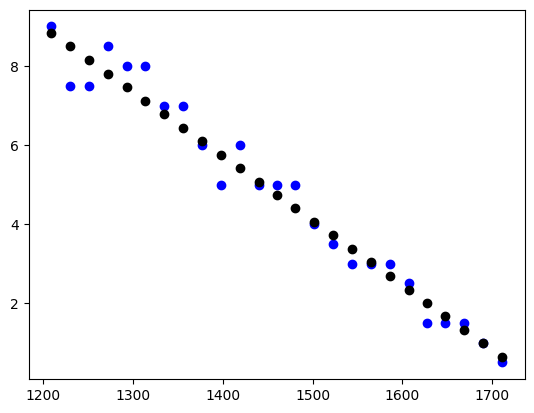

In [329]:
y_pred = regr2.predict(X2)
plt.scatter(X2, y2, color="b")
plt.scatter(X2, y_pred, color="k")

plt.show()

In [330]:
regr2.coef_, regr2.intercept_

(array([[-0.0163165]]), array([28.56461754]))

In [331]:
m2 = []
b2 = []
for i in range(len(dfs)):
    df = dfs[i]
    df[0] = df[0] - df[0][0]
    y_ = df[2]
    X_ = df[0]
    consider_from = len(y_) - y_[::-1].argmax() + 1
    X2_ = np.array(X_[consider_from:]).reshape(-1, 1)
    y2_ = np.array(y_[consider_from:]).reshape(-1, 1)
    # X_train, X_test, y_train, y_test = train_test_split(X2_, y2_, test_size = 0.2)
    regr_ = LinearRegression()
    regr_.fit(X2_, y2_)
    print(regr_.score(X2_, y2_))
    m2.append(regr_.coef_[0])
    b2.append(regr_.intercept_[0])

1.0
0.8999999999999999
0.8928571428571428
0.9746160334068631
0.9798473734904053
0.9461991661794772
0.9493788635934685
0.9683743905010336
0.9766207612983608
0.9777417793228916
0.9733846827810962
0.982176133624767
0.9745142467181941
0.9717939918768923
0.980869033581322


In [332]:
b2

[0.5,
 4.571428571428572,
 4.838095238095239,
 7.048867760568417,
 8.148484848484848,
 9.066539564761856,
 10.300461969177073,
 10.689755313148765,
 12.061840859024974,
 12.115837198034196,
 16.456814426864238,
 20.921644519651466,
 25.32328722002635,
 29.973846107384343,
 48.52912844109169]

In [333]:
np.var(m2), np.mean(m2)

(1.878672521228496e-05, -0.015234230888136939)

In [334]:
np.mean(m1), np.mean(m2)

(0.01677242719201212, -0.015234230888136939)

In [335]:
m1 = np.mean(m1)
m2 = np.mean(m2)

In [336]:
regr2.coef_

array([[-0.0163165]])

In [337]:
y1

array([[0. ],
       [0.5],
       [1. ],
       [1.5],
       [1.5],
       [1.5],
       [2.5],
       [2.5],
       [2.5],
       [3.5],
       [3.5],
       [3.5],
       [4. ],
       [5. ],
       [5. ],
       [5. ],
       [6. ],
       [6. ],
       [6. ],
       [6. ],
       [7. ],
       [8. ],
       [8. ],
       [7. ],
       [7.5],
       [9. ]])

In [338]:
# m1 = 0.015898235185335192
# m2 = -0.015130770105314221

In [339]:
(np.round(m1 * X1 * 2) / 2)

array([[0. ],
       [0.5],
       [0.5],
       [1. ],
       [1.5],
       [2. ],
       [2. ],
       [2.5],
       [3. ],
       [3. ],
       [3.5],
       [4. ],
       [4. ],
       [4.5],
       [5. ],
       [5. ],
       [5.5],
       [6. ],
       [6.5],
       [6.5],
       [7. ],
       [7.5],
       [7.5],
       [8. ],
       [8.5],
       [8.5]])

In [340]:
slope_count_pred = (np.round(m1 * X1 * 2) / 2).sum() * 2
slope_count_real = y2.sum() + y1.sum()
slope_count_pred, slope_count_real

(227.0, 233.0)

In [341]:
flat_remaining_count = targets[idx] - slope_count_pred

In [342]:
s = tau * speed / 1000
flat_time = round(flat_remaining_count / s)
flat_time, s, flat_remaining_count % s

(34, 8.0, 1.0)

In [343]:
yt.sum(), flat_time * s + slope_count_pred

(500.0, 499.0)

Now note that X1 won't be available to us, so we can use the fact that slope of speed
is constant until it saturates

In [344]:
till = (
    s + 0.5
) / m1  # allow top speed to saturate above by 0.5 for 400 pulses per second u20 observation
till

506.7841346211436

In [345]:
X1new = np.arange(0, int(till), tau)
slope_time = len(X1new)
X1new

array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
       260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500])

In [346]:
np.round(m1 * X1new * 2) / 2

array([0. , 0.5, 0.5, 1. , 1.5, 1.5, 2. , 2.5, 2.5, 3. , 3.5, 3.5, 4. ,
       4.5, 4.5, 5. , 5.5, 5.5, 6. , 6.5, 6.5, 7. , 7.5, 7.5, 8. , 8.5])

In [347]:
y1pred = np.round(m1 * X1new * 2) / 2
slope_count_pred = y1pred.sum() * 2
slope_count_pred, slope_count_real

(217.0, 233.0)

In [348]:
flat_remaining_count = targets[idx] - slope_count_pred
flat_time = round(flat_remaining_count / s)
flat_time

35

In [349]:
yt.sum(), flat_time * s + slope_count_pred

(500.0, 497.0)

Generate times and their predictions

In [350]:
X3new = np.arange(X1new[-1] + tau, X1new[-1] + (flat_time) * tau + 1, tau)
assert len(X3new) == flat_time

In [351]:
X3new

array([ 520,  540,  560,  580,  600,  620,  640,  660,  680,  700,  720,
        740,  760,  780,  800,  820,  840,  860,  880,  900,  920,  940,
        960,  980, 1000, 1020, 1040, 1060, 1080, 1100, 1120, 1140, 1160,
       1180, 1200])

In [352]:
X2new = np.arange(X3new[-1] + tau, X3new[-1] + (slope_time) * tau + 1, tau)
assert len(X2new) == slope_time

In [353]:
X2new

array([1220, 1240, 1260, 1280, 1300, 1320, 1340, 1360, 1380, 1400, 1420,
       1440, 1460, 1480, 1500, 1520, 1540, 1560, 1580, 1600, 1620, 1640,
       1660, 1680, 1700, 1720])

In [354]:
Xnew = np.concatenate([X1new, X3new, X2new])

In [355]:
b = -((X2new[-1]) * m2)
b, b2[idx]

(26.202877127595535, 29.973846107384343)

In [356]:
y2pred = np.round((m2 * X2new + b) * 2) / 2

In [357]:
y3pred = np.array([s] * flat_time)

In [358]:
ypred = np.concatenate([y1pred, y3pred, y2pred])

In [359]:
ypred.sum(), yt.sum(), len(ypred), len(yt)

(487.5, 500.0, 87, 83)

In [360]:
ypred

array([0. , 0.5, 0.5, 1. , 1.5, 1.5, 2. , 2.5, 2.5, 3. , 3.5, 3.5, 4. ,
       4.5, 4.5, 5. , 5.5, 5.5, 6. , 6.5, 6.5, 7. , 7.5, 7.5, 8. , 8.5,
       8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. ,
       8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. ,
       8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 7.5, 7.5, 7. , 6.5,
       6.5, 6. , 6. , 5.5, 5. , 5. , 4.5, 4.5, 4. , 3.5, 3.5, 3. , 2.5,
       2.5, 2. , 2. , 1.5, 1. , 1. , 0.5, 0.5, 0. ])

In [361]:
np.array(yt)

array([0. , 0.5, 1. , 1.5, 1.5, 1.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5, 4. ,
       5. , 5. , 5. , 6. , 6. , 6. , 6. , 7. , 8. , 8. , 7. , 7.5, 9. ,
       7.5, 7.5, 9. , 9. , 9. , 7.5, 7.5, 9. , 9. , 9. , 7.5, 7.5, 9. ,
       9. , 7.5, 7.5, 9. , 9. , 9. , 7.5, 7.5, 9. , 9. , 9. , 7.5, 7.5,
       9. , 9. , 7.5, 7.5, 9. , 9. , 9. , 7.5, 7.5, 8.5, 8. , 8. , 7. ,
       7. , 6. , 5. , 6. , 5. , 5. , 5. , 4. , 3.5, 3. , 3. , 3. , 2.5,
       1.5, 1.5, 1.5, 1. , 0.5])

In [362]:
ypred

array([0. , 0.5, 0.5, 1. , 1.5, 1.5, 2. , 2.5, 2.5, 3. , 3.5, 3.5, 4. ,
       4.5, 4.5, 5. , 5.5, 5.5, 6. , 6.5, 6.5, 7. , 7.5, 7.5, 8. , 8.5,
       8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. ,
       8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. ,
       8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 7.5, 7.5, 7. , 6.5,
       6.5, 6. , 6. , 5.5, 5. , 5. , 4.5, 4.5, 4. , 3.5, 3.5, 3. , 2.5,
       2.5, 2. , 2. , 1.5, 1. , 1. , 0.5, 0.5, 0. ])

In [363]:
n = len(ypred)

In [364]:
transform = -0.5 * np.roll(np.eye(n), 2).T + 0.5 * np.eye(n)
transform[0][0] = 1
transform[0][-1] = 0
transform

array([[ 1. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [-0.5,  0.5,  0. , ...,  0. ,  0. ,  0. ],
       [-0.5,  0. ,  0.5, ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0.5,  0. ],
       [ 0. ,  0. ,  0. , ..., -0.5,  0. ,  0.5]])

In [365]:
inv_transform = np.linalg.inv(transform)

In [366]:
ypred = np.concatenate([[0], ypred[:-1]])

In [367]:
ypred = inv_transform @ ypred

In [368]:
Xnew

array([   0,   20,   40,   60,   80,  100,  120,  140,  160,  180,  200,
        220,  240,  260,  280,  300,  320,  340,  360,  380,  400,  420,
        440,  460,  480,  500,  520,  540,  560,  580,  600,  620,  640,
        660,  680,  700,  720,  740,  760,  780,  800,  820,  840,  860,
        880,  900,  920,  940,  960,  980, 1000, 1020, 1040, 1060, 1080,
       1100, 1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280, 1300,
       1320, 1340, 1360, 1380, 1400, 1420, 1440, 1460, 1480, 1500, 1520,
       1540, 1560, 1580, 1600, 1620, 1640, 1660, 1680, 1700, 1720])

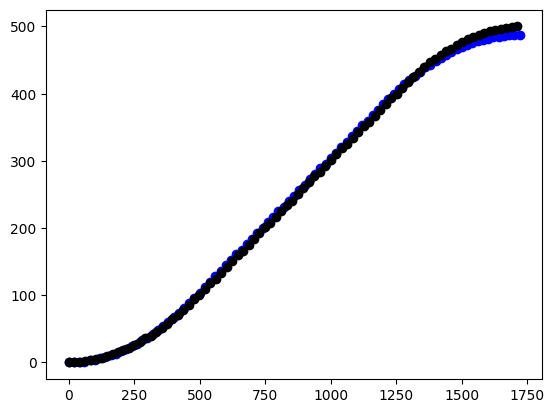

In [369]:
plt.scatter(Xnew, ypred, color="b")
plt.scatter(dfs[idx][0], dfs[idx][1], color="k")
# plt.scatter(Xt, yt, color="k")

plt.show()